<a href="https://colab.research.google.com/github/bhavadha19/Cryptocurrency_Price_Prediction_using_DL/blob/main/Half_hourly_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Publication project/code/Dataset/blockchain_dot_com_half_hourly_data.csv')
df.head()

,datetime,transaction_rate,mempool_size,market_cap_usd
0,2009-01-03 00:00:00,NaN,NaN,NaN
1,2009-01-03 00:30:00,NaN,NaN,NaN
2,2009-01-03 01:00:00,NaN,NaN,NaN
3,2009-01-03 01:30:00,NaN,NaN,NaN
4,2009-01-03 02:00:00,NaN,NaN,NaN


**Datetime vs market_cap_usd**

In [ ]:
df.tail()

,datetime,transaction_rate,mempool_size,market_cap_usd
257105,2023-09-03 08:30:00,5.925000,9.939953e+07,5.044241e+11
257106,2023-09-03 09:00:00,2.466667,1.000669e+08,5.043761e+11
257107,2023-09-03 09:30:00,12.325000,9.875739e+07,5.052431e+11
257108,2023-09-03 10:00:00,6.416667,9.904882e+07,5.047184e+11
257109,2023-09-03 10:30:00,6.441667,9.907231e+07,5.047581e+11


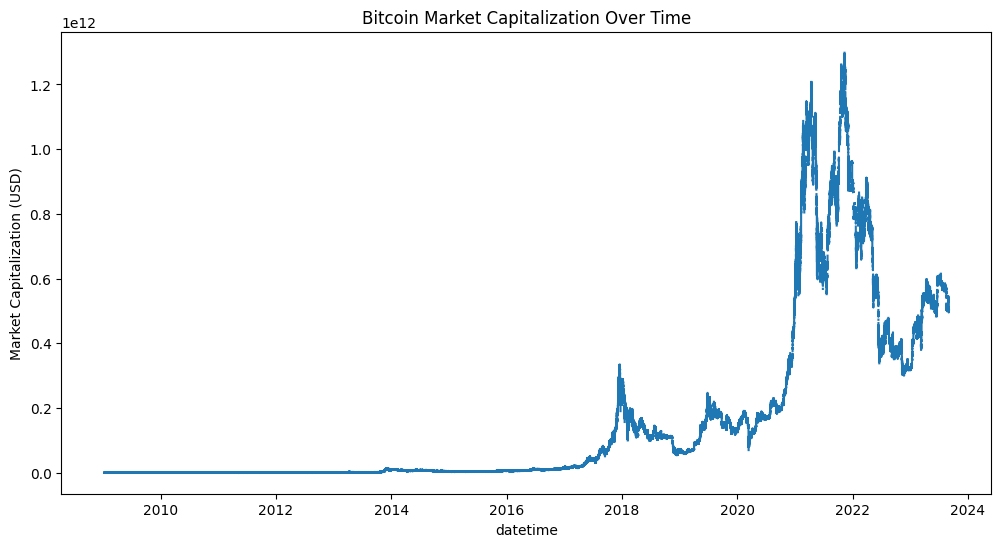

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime format (if needed)
# Handle potential missing time components
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Set 'datetime' as the index for time series analysis
df.set_index('datetime', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.plot(df['market_cap_usd'])
plt.xlabel('datetime')
plt.ylabel('Market Capitalization (USD)')
plt.title('Bitcoin Market Capitalization Over Time')
plt.show()

In [ ]:
df.shape

(257110, 3)

In [ ]:
df.isnull().sum()

transaction_rate    130524
mempool_size        130558
market_cap_usd       60233
dtype: int64

In [ ]:
df['transaction_rate'] = df['transaction_rate'].fillna(df['transaction_rate'].mean())
df['mempool_size'] = df['mempool_size'].fillna(df['mempool_size'].mean())
df['market_cap_usd'] = df['market_cap_usd'].fillna(df['market_cap_usd'].mean())

In [ ]:
df.isnull().sum()

transaction_rate    0
mempool_size        0
market_cap_usd      0
dtype: int64

In [ ]:
"""from sklearn.utils import resample
df = pd.DataFrame(df)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Convert monetary columns to numeric format
monetary_cols = ['Open', 'High', 'Low', 'Close', 'Adj_Close','Volume']

# Resample the DataFrame to daily frequency and interpolate missing values
df_resampled = df.resample('D').interpolate()
df_resampled['Close'] = df_resampled['Close'].fillna(method='ffill')

# Separate the features and target variable
X = df_resampled.drop('Close', axis=1)
y = df_resampled['Close']

# Resample the features and target variable to the desired length
X_resampled, y_resampled = resample(X, y, n_samples=len(df_resampled), random_state=42)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Close'])], axis=1)

# Append the resampled data to the original DataFrame
df_extended = pd.concat([df, df_resampled], axis=0)

# Print the extended DataFrame
print(df_extended)
data=df_extended"""

"from sklearn.utils import resample\ndf = pd.DataFrame(df)\n\n# Convert 'Date' column to datetime format\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Set 'Date' column as index\ndf.set_index('Date', inplace=True)\n\n# Convert monetary columns to numeric format\nmonetary_cols = ['Open', 'High', 'Low', 'Close', 'Adj_Close','Volume']\n\n# Resample the DataFrame to daily frequency and interpolate missing values\ndf_resampled = df.resample('D').interpolate()\ndf_resampled['Close'] = df_resampled['Close'].fillna(method='ffill')\n\n# Separate the features and target variable\nX = df_resampled.drop('Close', axis=1)\ny = df_resampled['Close']\n\n# Resample the features and target variable to the desired length\nX_resampled, y_resampled = resample(X, y, n_samples=len(df_resampled), random_state=42)\n\n# Create a new DataFrame with the resampled data\ndf_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Close'])], axis=1)\n\n# Append the res

In [ ]:
# !pip install ruptures

# import numpy as np
# import pandas as pd
# import ruptures as rpt

# # Generate some sample data
# np.random.seed(42)
# data = np.random.normal(0, 1, 200)

# # Perform change point detection using the Pelt method
# model = "l2"  # "l2" for least squares, "rbf" for gaussian kernel
# algo = rpt.Pelt(model=model).fit(data)
# result = algo.predict(pen=10)

# # Print the change point indices
# print(result)


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(data)
# for cp in result:
#     plt.axvline(cp, color='r', linestyle='--')
# plt.show()

In [ ]:
# # Assuming result contains change points at indices 40 and 125
# segment1 = data[0:40]
# segment2 = data[40:125]
# segment3 = data[125:200]

# # Calculate mean, standard deviation, etc. for each segment
# # print(f"Segment 1 mean: {segment1.mean()}")
# # ... Repeat for other segments and statistics
# print(f"Segment 2 mean: {segment2.mean()}")
# print(f"Segment 3 mean: {segment3.mean()}")
# '''16/3/24'''

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['market_cap_usd'].values.reshape(-1, 1))

In [ ]:
sequence_length = 10
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(179970, 10)

In [ ]:
X_test.shape

(77130, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
#model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=25))
#model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
5625/5625 [==============================] - 121s 20ms/step - loss: 0.0082
Epoch 2/10
5625/5625 [==============================] - 118s 21ms/step - loss: 0.0077
Epoch 3/10
5625/5625 [==============================] - 114s 20ms/step - loss: 0.0076
Epoch 4/10
5625/5625 [==============================] - 116s 21ms/step - loss: 0.0076
Epoch 5/10
5625/5625 [==============================] - 114s 20ms/step - loss: 0.0075
Epoch 6/10
5625/5625 [==============================] - 115s 20ms/step - loss: 0.0075
Epoch 7/10
5625/5625 [==============================] - 115s 20ms/step - loss: 0.0075
Epoch 8/10
5625/5625 [==============================] - 112s 20ms/step - loss: 0.0075
Epoch 9/10
5625/5625 [==============================] - 115s 20ms/step - loss: 0.0075
Epoch 10/10
5625/5625 [==============================] - 114s 20ms/step - loss: 0.0075


In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Predictions
y_pred = model.predict(X_test)
accuracy = 1 - loss

print("Accuracy:", accuracy)

Epoch 1/10
2250/2250 [==============================] - 58s 26ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 2/10
2250/2250 [==============================] - 57s 25ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 3/10
2250/2250 [==============================] - 56s 25ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 4/10
2250/2250 [==============================] - 57s 25ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 5/10
2250/2250 [==============================] - 57s 25ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 6/10
2250/2250 [==============================] - 57s 25ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 7/10
2250/2250 [==============================] - 56s 25ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 8/10
2250/2250 [==============================] - 56s 25ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 9/10
2250/2250 [==============================] - 57s 25ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 10/10
2411/2411 [==============================] - 18s 7ms

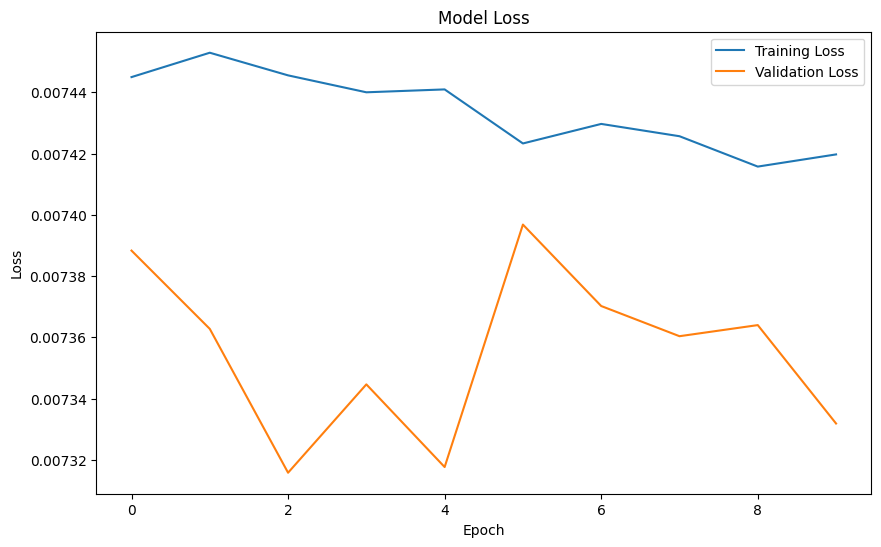

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss/accuracy
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
test_predictions = model.predict(X_test)

2411/2411 [==============================] - 17s 7ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate the model on the testing data
test_predictions = model.predict(X_test)

# Inverse transform the predictions to get actual prices
predicted_prices = scaler.inverse_transform(test_predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

'''plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()'''

2411/2411 [==============================] - 16s 7ms/step
Mean Absolute Error (MAE): 65260163568.54709
Mean Squared Error (MSE): 1.248751475687094e+22
Root Mean Squared Error (RMSE): 111747549220.87079


"plt.figure(figsize=(10, 6))\nplt.plot(actual_prices, label='Actual Prices', color='blue')\nplt.plot(predicted_prices, label='Predicted Prices', color='red')\nplt.title('BTC Price Prediction')\nplt.xlabel('Time')\nplt.ylabel('Price')\nplt.legend()\nplt.show()"

In [ ]:
# Range of the target variable
target_range = df['market_cap_usd'].max() - df['market_cap_usd'].min()

# Convert errors to percentage
mae_percentage = (mae / target_range) * 100
mse_percentage = (mse / target_range) * 100
rmse_percentage = (rmse / target_range) * 100

print(f"Mean Absolute Error (MAE) Percentage: {mae_percentage}%")
print(f"Mean Squared Error (MSE) Percentage: {mse_percentage}%")
print(f"Root Mean Squared Error (RMSE) Percentage: {rmse_percentage}%")

Mean Absolute Error (MAE) Percentage: 5.026884568335195%
Mean Squared Error (MSE) Percentage: 961893010921.3959%
Root Mean Squared Error (RMSE) Percentage: 8.607732497293513%


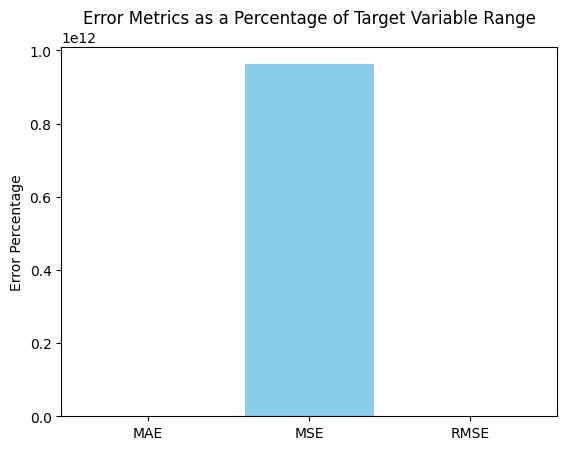

In [ ]:
import matplotlib.pyplot as plt

# Range of the target variable
target_range = df['market_cap_usd'].max() - df['market_cap_usd'].min()

# Convert errors to percentage
mae_percentage = (mae / target_range) * 100
mse_percentage = (mse / target_range) * 100
rmse_percentage = (rmse / target_range) * 100

# Plotting
errors = ['MAE', 'MSE', 'RMSE']
values = [mae_percentage, mse_percentage, rmse_percentage]

plt.bar(errors, values, color='skyblue')
plt.ylabel('Error Percentage')
plt.title('Error Metrics as a Percentage of Target Variable Range')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have your trained model (`model`), scaled test data (`X_test`),
# target test data (`y_test`), and scaler (`scaler`)

# Evaluate the model on the testing data
test_predictions = model.predict(X_test)

# Inverse transform the predictions to get actual prices
predicted_prices = scaler.inverse_transform(test_predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Regression Evaluation Metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Optional: Visualization (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, color='blue', label='Predictions')
plt.plot(actual_prices, actual_prices, color='red', linestyle='--', label='Actual Prices')  # Perfect prediction line
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Price Prediction Comparison')
plt.legend()
plt.grid(True)
plt.show()


 301/2411 [==>...........................] - ETA: 12s